In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

from pdb import set_trace

from sympy import *
from sympy.utilities.lambdify import lambdify
from sympy.abc import x

from sympy import init_printing
init_printing()

def Complex_Fourier(func, N, interval=(-1, 1)):
    x = symbols('x', real=True)
    n = symbols('n', integer=True)
    L = interval[1]-interval[0]
    basis = sqrt(1/L)*exp((1j)*(2*n*pi*x/L))
    conjugate_basis = conjugate(basis)
    Cn = integrate(func*conjugate_basis, (x, -L/2, L/2))
#     set_trace()
    fs = summation(Cn*basis, (n, -N, N))
    fs_lam = lambdify(x, fs, 'numpy')
    return fs, fs_lam

x_vals = np.linspace(0, 2, 100)

func = x/2
func_lam = lambdify(x, func, 'numpy')
func_vals = func_lam(x_vals)

fs, fs_lam = Complex_Fourier(func, 0, interval=(0, pi))
# fs_lam = lambdify(x, fs, 'numpy')
fs_vals = fs_lam(x_vals)

plt.plot(x_vals, func_vals)
# plt.plot(x_vals, fs_vals)

# plot(func, (x, -pi, pi))
# plot(fs.subs(n, 2), (x, -pi, pi))

plt.show()

In [ ]:
fs_vals

In [ ]:
##Test outside function

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

from pdb import set_trace

from sympy import *
from sympy.utilities.lambdify import lambdify
from sympy.abc import x

from sympy import init_printing
init_printing()

x = symbols('x', real=True)
n = symbols('n', integer=True)
interval = (-pi, pi)
L = interval[1]-interval[0]
N = 1

func = 1 + x**2

basis = sqrt(1/L)*exp((1j)*(2*n*pi*x/L))
# conjugate_basis = sqrt(1/L)*exp((-1j)*(2*n*pi*x/L))
conjugate_basis = conjugate(basis)
Cn = integrate(func*conjugate_basis, (x, -L/2, L/2))
fs = summation(Cn*basis, (n, -N, N))

In [ ]:
##Test inside function

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

from pdb import set_trace

from sympy import *
from sympy.utilities.lambdify import lambdify
from sympy.abc import x

from sympy import init_printing
init_printing()



def Complex_Fourier(func, N, interval=(-1, 1)):
    x = symbols('x', real=True)
    n = symbols('n', integer=True)
    L = interval[1]-interval[0]
    basis = sqrt(1/L)*exp((1j)*(2*n*pi*x/L))
    conjugate_basis = conjugate(basis)
    Cn = integrate(func*conjugate_basis, (x, -L/2, L/2))
    fs = summation(Cn*basis, (n, -N, N))
    return fs

x = symbols('x', real=True)
func = 1 + x**2
fs = Complex_Fourier(func, 0, interval=(-pi, pi))


# conjugate_basis = sqrt(1/L)*exp((-1j)*(2*n*pi*x/L))




In [3]:
## Golden Child
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from pdb import set_trace

from __future__ import print_function
from sympy import *
from sympy.utilities.lambdify import lambdify
from sympy.abc import x
from sympy import init_printing
init_printing()




def Complex_Fourier(func, N, interval=(-1, 1)):
    x = symbols('x', real=True)
    n = symbols('n', integer=True)
    L = interval[1]-interval[0]
    basis = sqrt(1/L)*exp((I)*(2*n*pi*x/L))
    Cn = integrate(func*conjugate(basis), (x, -L/2, L/2))
    fs = summation(Cn*basis, (n, -N, N))
    return Cn, fs

def Parseval_Theorem(func, N, Cn, interval=(-1, 1)):
    x = symbols('x', real=True)
    n = symbols('n', integer=True)
    L = interval[1]-interval[0]
    par_left = (1/L)*integrate(func**2, (x, -L/2, L/2))
    par_right = summation(simplify(Cn*conjugate(Cn)), (n, -N, N))
    return float(par_left), par_right.evalf(), (par_left/par_right).evalf().simplify()

N = 10
interval = (-1/2, 1/2)
x = symbols('x', real=True)
x_vals = np.linspace(interval[0], interval[1], 100)

func = sin(pi*x)
# func = exp(x)
func_lam = lambdify(x, func, 'numpy')
func_vals = func_lam(x_vals)

Cn, fs = Complex_Fourier(func, N, interval=interval)
fs_lam = lambdify(x, fs, 'numpy')
fs_vals = fs_lam(x_vals)

par_left, par_right, par_ratio = Parseval_Theorem(func, N, Cn, interval=interval)


plt.title(r"Parseval's Theorem: "
          r"$\displaystyle\frac{1}{L}\int_{-L/2}^{L/2} |f(x)|^2 dx$ = $\displaystyle\sum_{n=-\infty}^{\infty} |C_n|^{2}$"+'\n'
          r"$\displaystyle\frac{1}{L}\int_{-L/2}^{L/2} |f(x)|^2 dx = $"+r"$\displaystyle\ {}$".format(par_left)+'\n'
#           r"$\displaystyle\sum_{n=-\infty}^{\infty} |C_n|^{2} = $"+r"$\displaystyle\ {}$".format(par_right),
          r"$\displaystyle\sum_{n=-"+str(N)+"}^"+str(N)+"|C_n|^{2} = $"+r"$\displaystyle\ {}$".format(par_right),
          fontsize=16)
plt.plot(x_vals, func_vals, 'r')
plt.plot(x_vals, fs_vals, 'g.')
plt.show()

ImportError: cannot import name multiarray

In [116]:
Parseval_Theorem(func, N, Cn, interval=interval)

Ratio of Parseval's Theorem Result is:


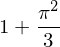

In [29]:
# factor(simplify(fs.expand(basic=True)))
# factor(simplify(fs.expand()))
# simplify(fs)
expand(fs)

In [55]:
x = symbols('x', real=True)
n = symbols('n', integer=True)
L = 1
basis = sqrt(1/L)*exp((1j)*(2*n*pi*x/L))
print(basis*conjugate(basis))

1


In [22]:
abs(f)

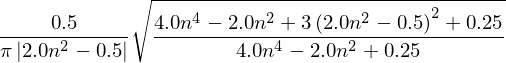

In [61]:
# simplify(Cn*conjugate(Cn))
simplify(abs(Cn))

In [108]:
" 1/(2pi)int_(-pi)^pi|f(x)|^2dx=sum_(n=-infty)^infty|a_n|^2. "

ValueError: Invalid limits given: ('stuff',)

In [111]:
print(type(I))

<class 'sympy.core.numbers.ImaginaryUnit'>
